# Домашнее задание: линейная классификация

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Сперва загрузим датасет в Python

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
data.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
250,15810075,Female,44,39000,0
44,15715541,Female,28,84000,0
170,15587013,Male,21,88000,0
124,15678168,Female,41,51000,0
154,15605327,Male,40,47000,0


Данный набор данных, содержит информацию о том, покупает ли продукт человек определенного возраста, пола и с определенным доходом или нет.
Нам нужно предсказать, купит ли продукт целевая аудитория или нет.

## Предварительный анализ данных

Очевиндо, что столбец, который соответствует ID пользователя не несет для нас никакой ценной информации. Следовательно, чтобы модель не путалась из-за этого столбца, его следует удалить

In [3]:
data.drop('User ID', axis = 1)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


Посмотрим, есть ли пропущенные значения в датасете

In [4]:
data.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


> Какие выводы можно сделать о пропущенных значениях? Нужно ли заполнять пропущенные значения? Если нужно, то как? UNS: Пропущенных значений в датасете нет

Рассмотрим таблицу описательных статистик для датасета

In [5]:

print("----------Mean------------")
numeric_data = data[['Age', 'EstimatedSalary']]
mean = np.mean(numeric_data, axis= 0)
print(mean)
print()
print("--------Median------------")
med = numeric_data.median()
print(med)
print()
print("------------STD-----------------")
std_data = np.std(numeric_data, axis = 0)
print(std_data)
print()

data_max = np.max(numeric_data, axis = 0)
data_min = np.min(numeric_data, axis = 0)
print("-------MAX DATA-----")
print(data_max)
print("-------MIN DATA-----")
print(data_min)

----------Mean------------
Age                   37.655
EstimatedSalary    69742.500
dtype: float64

--------Median------------
Age                   37.0
EstimatedSalary    70000.0
dtype: float64

------------STD-----------------
Age                   10.469765
EstimatedSalary    34054.312410
dtype: float64

-------MAX DATA-----
Age                    60
EstimatedSalary    150000
dtype: int64
-------MIN DATA-----
Age                   18
EstimatedSalary    15000
dtype: int64


> Какие средние значения для каждого признака? Какие среднеквадратичные отклонения? Какие максимальные и минимальные значения?

Исследуем набор данных на выбросы с помощью графика
> Какой график отображает медиану, квартили и выбросы? Приведите команду для построения этого графика

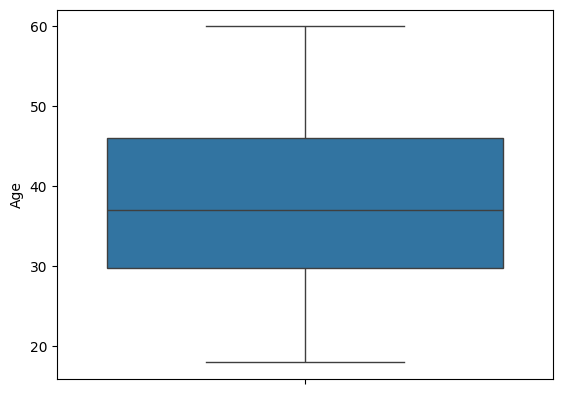

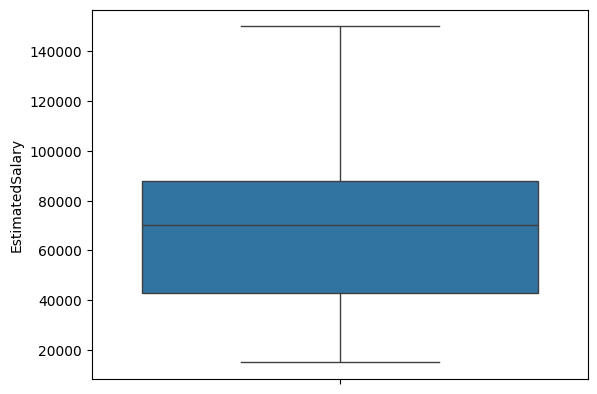

In [6]:
plt.figure()
sns.boxplot(data= numeric_data['Age'])
plt.show()

plt.figure()
sns.boxplot(data = numeric_data['EstimatedSalary'])
plt.show()

# Hint: если проблемы с масштабом, то можете вывести по отдельности

> Какие выводы о наличии аномальных значений можно сделать? Будут ли они сильно влиять на прогнозы модели? UNS: Имеются большие аномальные значения как в зарплате так и в возрасте, они будут сильно влиять на прогнозы модели.

Рассмотрим гистограммы распределений данных

PairPlot в данных 


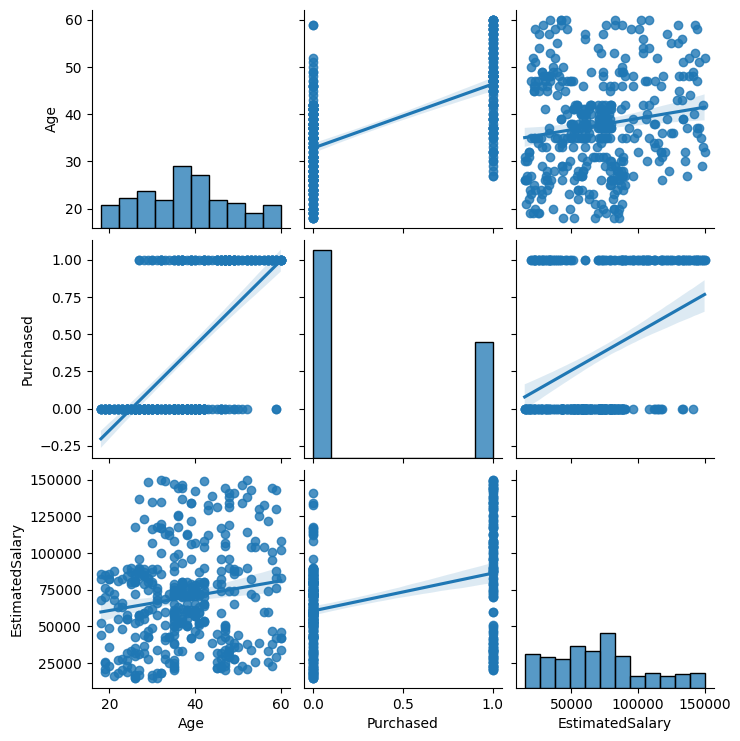


-----Посмотрим на плотности вероятностей--------


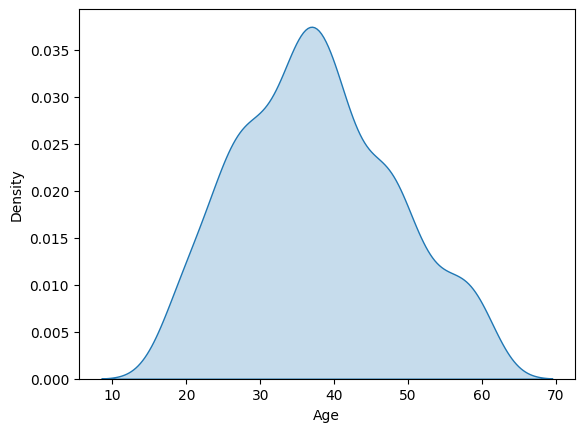

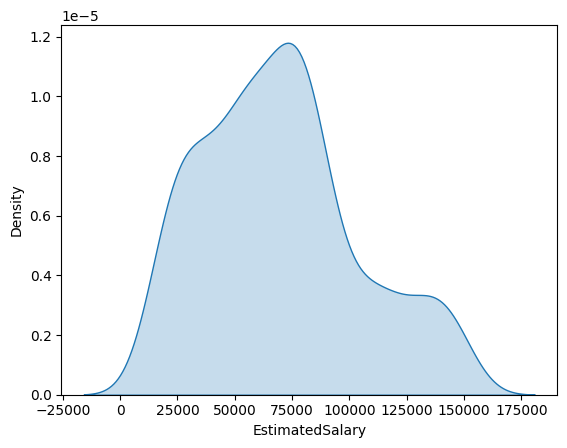

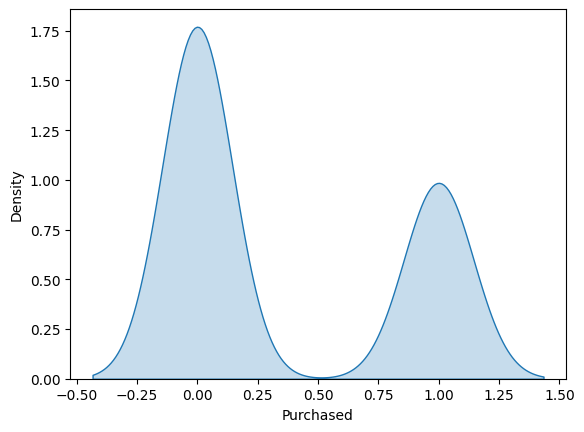

In [7]:
print("PairPlot в данных ")

dt = data[['Age', 'Purchased', 'EstimatedSalary']]
sns.pairplot(data = dt, kind='reg', diag_kind='auto')
plt.show()
print()
print("-----Посмотрим на плотности вероятностей--------")
sns.kdeplot(data = dt[['Age']], x = 'Age', fill = True)
plt.show()

sns.kdeplot(data = dt[['EstimatedSalary']], x = 'EstimatedSalary', fill = True)
plt.show()

sns.kdeplot(data = dt[['Purchased']], x = 'Purchased', fill = True)
plt.show()

> Какие выводы можно сделать о распределении `Age`? Схоже ли оно с нормальным распределением? UNS: Мода примерно 38, медиана примерно 37.6, среднее примерно 37. Распределенеи возраста схоже с нормальным со смещением влево.

> Какие выводы можно сделать о распределении `EsimatedSalary`? Схоже ли оно с нормальным распределением? UNS: Медиана 7000, мода примерно 7300, среднее примерно 6900. Распределение схоже с нормальным, со смещением влево.

> Какие выводы можно сделать о распределении `Purchased`? Как называется распределение, которому подчиняется эта случайная величина? UNS: Бимодальное распределение.

Сделаем еще некоторые предварительные выводы о взаимосвязи целевой переменной `Purchased` с остальными. Например, рассмотрим взаимосвязь `Gender` и `Age` с `Purchased`

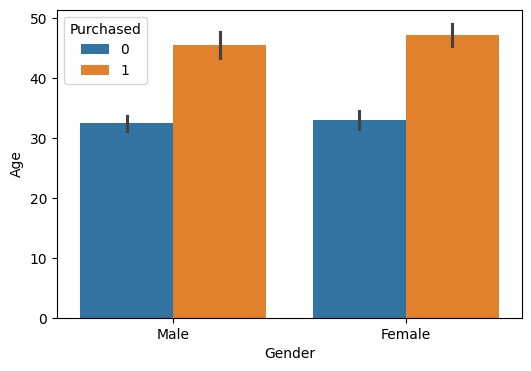

In [8]:
plt.figure(figsize=(6, 4))

# .barplot() - по умолчанию строит среднее значение для относительно Y;
# Можно помнять на медиану, добавивив: estimator = np.median
# hue - Дополнительное разделение
sns.barplot(data=data, x='Gender', y='Age', hue = 'Purchased')

plt.show()

> Есть ли некоторая статистическая взаимосвязь между возрастом покупателя и совершением покупки? UNS: Люди со средним возрастом 31 - 33 не покупают товар, но с возрастом 44 - 47 покупают его.

> Есть ли статистическая разница между группами при совершении покупки? UNS: средний возраст группы мужчин которые совершают покупку меньше, по сравнению со средним возрастом группы женщин, которые тоже совершают покупку. Так же и в
случае не совершения покупки.

Аналогично разделим на две группы по `Gender` и рассмотрим связь между `EstimatedSalary` и `Purchased`

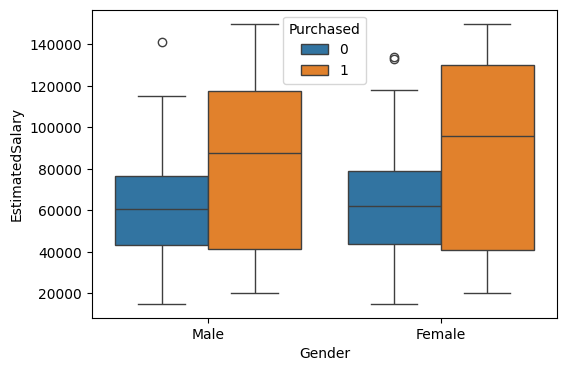

In [9]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='Gender', y='EstimatedSalary', hue='Purchased')

plt.show()

> Есть ли некоторая статистическая взаимосвязь между запрлатой покупателя и совершением покупки? UNS: Да есть,

> Есть ли статистическая разница между группами при совершении покупки? Да, незначитаельная

> Подумайте является ли `Gender` значимым фактором или мы можем удалить его?

Из графиков заметно, что ответ на последний вопрос <<не является>>. Следовательно, этот признак можно исключить из модели

In [10]:
dt = data.drop(['Gender', 'User ID'], axis = 1)
print(dt)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


В итоге для моделирования у нас остались два значимых признака: `Age` и `EstimatedSalary`. Обозначим признаки за $X$, а целевую переменную за $y$

In [11]:
X = dt.iloc[:, :-1].values
y = dt.iloc[:, -1].values

Приняв каждый из признаков за координаты точек в признаковом пространстве, построим график рассеяния с метками классов

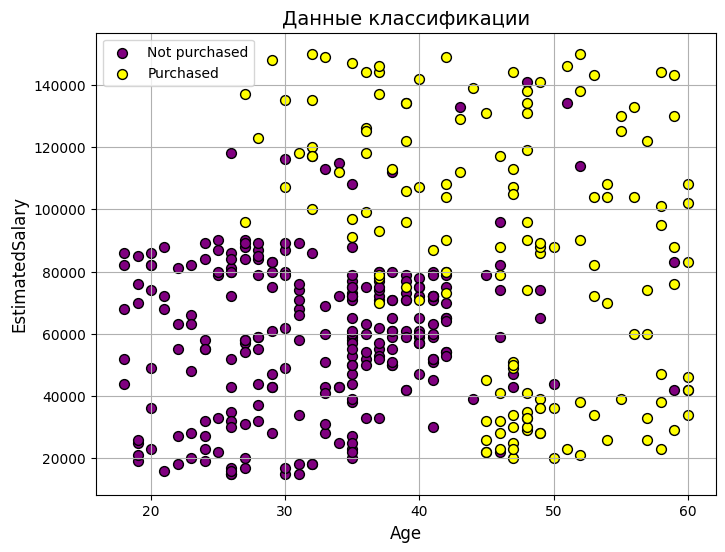

In [12]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X[y == 0][:, 0], X[y == 0][:, 1], c='purple', edgecolor='k', s=50, label='Not purchased',
)

scatter = plt.scatter(
    X[y == 1][:, 0], X[y == 1][:, 1], c='yellow', edgecolor='k', s=50, label='Purchased',
)

plt.title("Данные классификации", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("EstimatedSalary", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

Как видно, некоторая четко разделимая взаимосвязь есть.

> Попробуйте объяснить с физической точки зрения, какая взаимосвязь. Как возраст и зарплата в совокупности влияют на совершение покупки

В качестве последнего этапа стандартизируем нашу выборку, чтобы модели лучше отрабатывали

In [13]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

> Нужно ли стандартизировать $y$?

Снова построим диаграмму рассеяния, чтобы посмотреть, как изменился результат

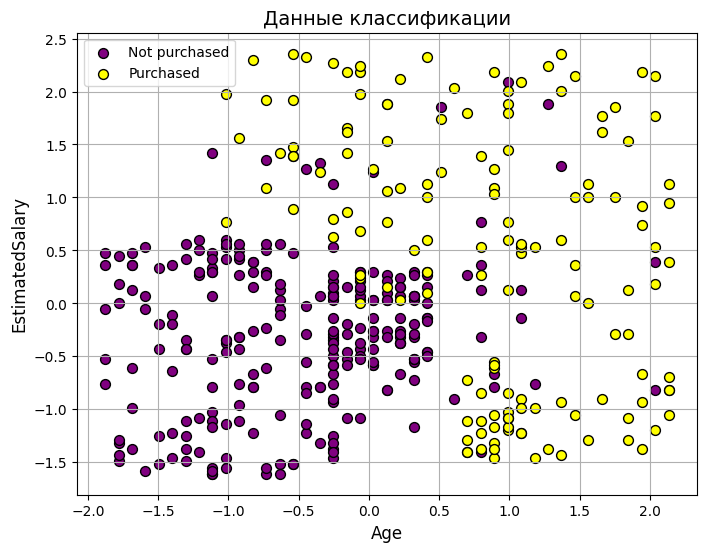

In [14]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X[y == 0][:, 0], X[y ==0][:, 1], c='purple', edgecolor='k', s=50, label='Not purchased',
)

scatter = plt.scatter(
    X[y == 1][:, 0], X[y == 1][:, 1], c='yellow', edgecolor='k', s=50, label='Purchased',
)

plt.title("Данные классификации", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("EstimatedSalary", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

> Что изменилось по сравнению с предыдущим случаем?

## Построение классификационных моделей

### Логистическая регрессия

Разделим всю выборку на train и test наборы

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

Теперь воспользуемся уже готовой реализацией модели линейной регрессии из библиотеки sklearn

In [16]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()

Обучим модель на train выборке

In [17]:
model1.fit(X_train, y_train)

LogisticRegression()

Определим функцию для визуализации разделяющей гиперплоскости

In [18]:
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                         np.arange(y_min, y_max, 1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title("Classification result")
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.show()

Построим разделяющую гиперплоскость на всей выборке

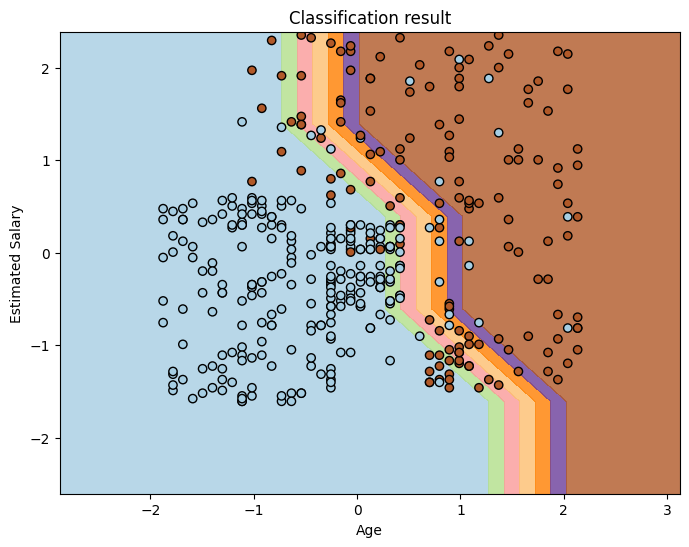

In [19]:
plot_decision_boundary(X, y, model1)

> Какие можно сделать выводы о качестве классификации из визуального представления?

Определим метрики классификации

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

И зададим функцию, которая сразу будет возвращать все метрики классификации

In [21]:
def show_metrics(target, predicts):
    confusion = confusion_matrix(target, predicts)
    accuracy = accuracy_score(target, predicts)
    precision = precision_score(target, predicts)
    recall = recall_score(target, predicts)

    print('=====================================')
    print(f'Confusion matrix : \n{confusion}')
    print('=====================================')
    print(f'Accuracy : {accuracy}')
    print('=====================================')
    print(f'Recall_Score : {recall}')
    print('=====================================')
    print(f'Precision Score : {precision}')

Вычислим значения метрик классификации на обучающей и тестовой выборках

In [22]:
y_hat = model1.predict(X_train)

show_metrics(y_train, y_hat)

Confusion matrix : 
[[179  15]
 [ 34  72]]
Accuracy : 0.8366666666666667
Recall_Score : 0.6792452830188679
Precision Score : 0.8275862068965517


In [23]:
y_pred = model1.predict(X_test)

show_metrics(y_test, y_pred)

Confusion matrix : 
[[61  2]
 [12 25]]
Accuracy : 0.86
Recall_Score : 0.6756756756756757
Precision Score : 0.9259259259259259


> Какие выводы можно сделать о результате классификации?

### Метод опорных векторов (линейный)

Проделяем все аналогичные действия для модели опорных векторов

In [24]:
from sklearn.svm import LinearSVC

model2 = LinearSVC()

Обучим модель на train выборке

In [25]:
model2.fit(X_train, y_train)

LinearSVC()

Построим разделяющую гиперплоскость на всей выборке

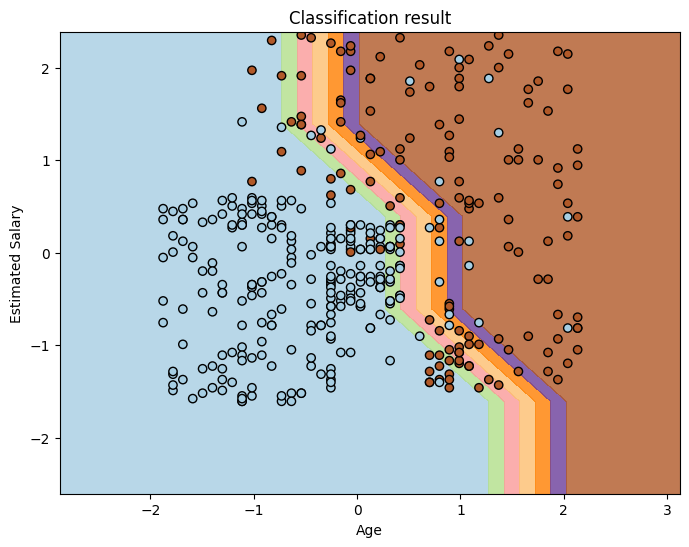

In [26]:
plot_decision_boundary(X, y, model2)

> Какие можно сделать выводы о качестве классификации из визуального представления? Есть ли кардинальные отличия по сравнению с логистической моделью?

Вычислим значения метрик классификации на обучающей и тестовой выборках

In [27]:
y_hat = model2.predict(X_train)

show_metrics(y_train, y_hat)

Confusion matrix : 
[[179  15]
 [ 36  70]]
Accuracy : 0.83
Recall_Score : 0.660377358490566
Precision Score : 0.8235294117647058


In [28]:
y_pred = model1.predict(X_test)

show_metrics(y_test, y_pred)

Confusion matrix : 
[[61  2]
 [12 25]]
Accuracy : 0.86
Recall_Score : 0.6756756756756757
Precision Score : 0.9259259259259259


> Какие выводы можно сделать о результате классификации? Стали ли метрики лучше по сравнению с логистической моделью или наоборот ухудшились?

### Метод опорных векторов (с ядром)

Здесь мы воспользуемся уже [готовой реализацией из sklearn](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py)

In [29]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

def plot_training_data_with_decision_boundary(clf, X, y, ax=None, support_vectors=True):

    # Settings for plotting
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 8))
    x_min, x_max, y_min, y_max = -3, 3, -3, 3
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    if support_vectors:
        # Plot bigger circles around samples that serve as support vectors
        ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=150,
            facecolors="none",
            edgecolors="k",
        )

    # Plot samples by color and add legend
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    ax.set_title(f" Decision boundaries of SVC")

    if ax is None:
        plt.show()

Далее обучим модель с линейным ядром (то же самое, что и в предыдущем случае)

/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1121: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


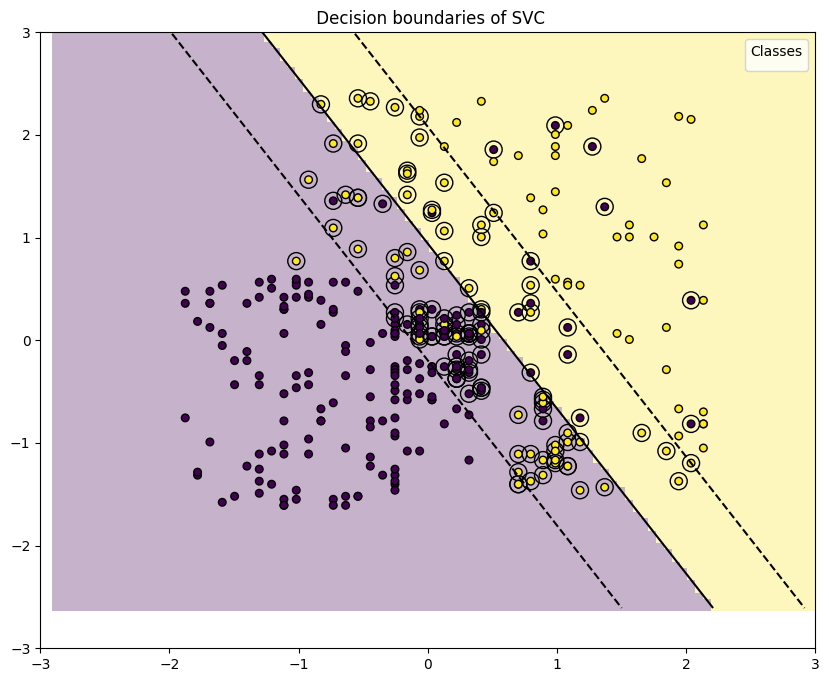

In [30]:
clf = svm.SVC(kernel='linear').fit(X_train, y_train)

plot_training_data_with_decision_boundary(clf, X_train, y_train)

Еще раз рассмотрим метрики на тестовом наборе, чтобы убедиться в том, что прошлый классификатор действительно имеет линейное ядро

In [31]:
y_pred = clf.predict(X_test)

show_metrics(y_test, y_pred)

Confusion matrix : 
[[61  2]
 [12 25]]
Accuracy : 0.86
Recall_Score : 0.6756756756756757
Precision Score : 0.9259259259259259


Теперь построим классификатор с полиномиальным ядром.

Из документации SVC:
- `degreeint, default=3`

Degree of the polynomial kernel function (‘poly’). Must be non-negative. Ignored by all other kernels.

Под этим понимается, что по стандарту модель использует полиномиальное ядро третьей степени

/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1121: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


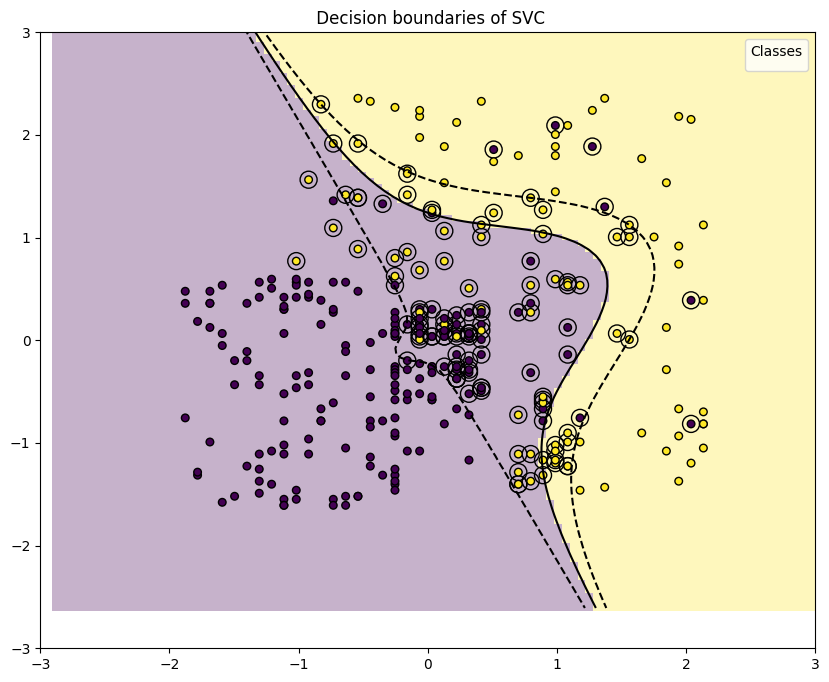

In [32]:
clf = svm.SVC(kernel='poly').fit(X_train, y_train)

plot_training_data_with_decision_boundary(clf, X_train, y_train)

Рассмотирм метрики на тестовом наборе

In [33]:
y_pred = clf.predict(X_test)

show_metrics(y_test, y_pred)

Confusion matrix : 
[[63  0]
 [14 23]]
Accuracy : 0.86
Recall_Score : 0.6216216216216216
Precision Score : 1.0


> Есть ли изменения в метриках? Что стало лучше, что стало худше? Что можно в целом сказать о модели: стала ли она качественнее классифицировать данные?

Теперь построим модель с использованием гауссовского ядра

/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1121: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


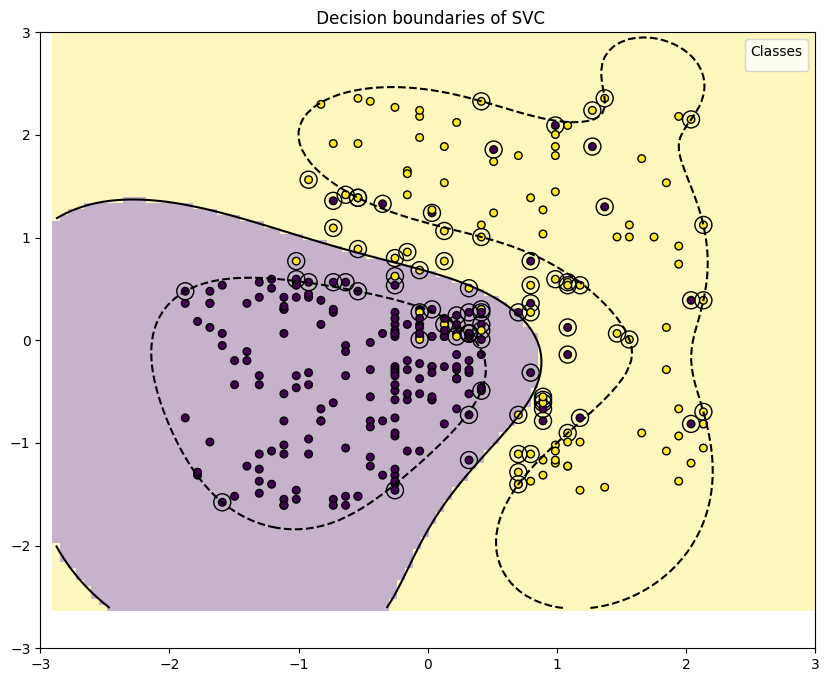

In [34]:
clf = svm.SVC(kernel='rbf').fit(X_train, y_train)

plot_training_data_with_decision_boundary(clf, X_train, y_train)

Рассмотирм метрики на тестовом наборе

In [37]:
y_pred = clf.predict(X_test)

show_metrics(y_test, y_pred)
print("--------------------------")
y_pred = clf.predict(X_train)
show_metrics(y_train, y_pred)

Confusion matrix : 
[[57  6]
 [ 1 36]]
Accuracy : 0.93
Recall_Score : 0.972972972972973
Precision Score : 0.8571428571428571
--------------------------
Confusion matrix : 
[[176  18]
 [ 11  95]]
Accuracy : 0.9033333333333333
Recall_Score : 0.8962264150943396
Precision Score : 0.8407079646017699


> Есть ли изменения в метриках? Что стало лучше, что стало худше? Что можно в целом сказать о модели: стала ли она качественнее классифицировать данные?

> Проведите сравнительный анализ всех моделей между собой

## Выводы

Таким образом, лучшей моделью (по вашему мнению) для решения задачи классификации покупательского спроса является модель -- SVM (SVC) c Гауссовским ядром

Она имеет следующие метрики:
- На Обучающем наборе
- - Accuracy : 0.9033333333333333
  - Precision : 0.8571428571428571
  - Recall : 0.8962264150943396
- На Тестовом наборе
- - Accuracy : 0.93
  - Precision : 0.8571428571428571
  - Recall : 0.972972972972973

Стоит понимать, что это не столько эталонный анализ, сколько базовый минимум. Вспомним, что в моделях также присутствуют гиперпараметры (например, регуляризация). По стандарту в моделях стоит значение $\lambda = 1$ для $L_2$ регуляризационного слагаемого. С помощью кросс-валидации по сетке можно было бы подобрать такой гиперпараметр, при котором результат классификации был бы лучше.

> По желанию можете попробовать реализовать кросс-валидацию по сетке значений гиперпараметра для логистической регрессии и линейной SVM. Попробуйте сравнить результаты